In [2]:
# Importing all required libraries
import pandas as pd
df=pd.read_csv("Tesla_dataset.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,29-06-2010,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,30-06-2010,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,01-07-2010,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,02-07-2010,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,06-07-2010,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [4]:
df.set_index('Date',inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
29-06-2010,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
30-06-2010,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
01-07-2010,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
02-07-2010,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
06-07-2010,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [5]:
print("Number of days present in the dataset", df.shape[0])

Number of days present in the dataset 3162


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3162 entries, 29-06-2010 to 19-01-2023
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3162 non-null   float64
 1   High       3162 non-null   float64
 2   Low        3162 non-null   float64
 3   Close      3162 non-null   float64
 4   Adj Close  3162 non-null   float64
 5   Volume     3162 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 172.9+ KB


In [8]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3162.000000,3162.000000,3162.000000,3162.000000,3162.000000,3.162000e+03
mean,59.090024,60.415403,57.622371,59.039845,59.039845,9.394769e+07
std,95.550672,97.746213,93.067484,95.420232,95.420232,8.175154e+07
min,1.076000,1.108667,0.998667,1.053333,1.053333,1.777500e+06
25%,9.037333,9.252500,8.828500,9.066833,9.066833,4.243012e+07
50%,16.294334,16.514666,16.016334,16.295666,16.295666,7.609725e+07
75%,24.965833,25.212667,24.438666,24.986833,24.986833,1.179720e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


In [9]:
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

In [10]:
# To check How many null values arw there.
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [11]:
# The stock prices are almost constant until 2019 and thus I'll take the split of the data to only work on the data that shows methodical/abrupt changes
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [14]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
29-06-2010,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
30-06-2010,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
01-07-2010,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
02-07-2010,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
06-07-2010,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...
12-01-2023,122.559998,124.129997,117.000000,123.559998,123.559998,169400900
13-01-2023,116.550003,122.629997,115.599998,122.400002,122.400002,180439300
17-01-2023,125.699997,131.699997,125.019997,131.490005,131.490005,186477000


**Plotting The Graph**

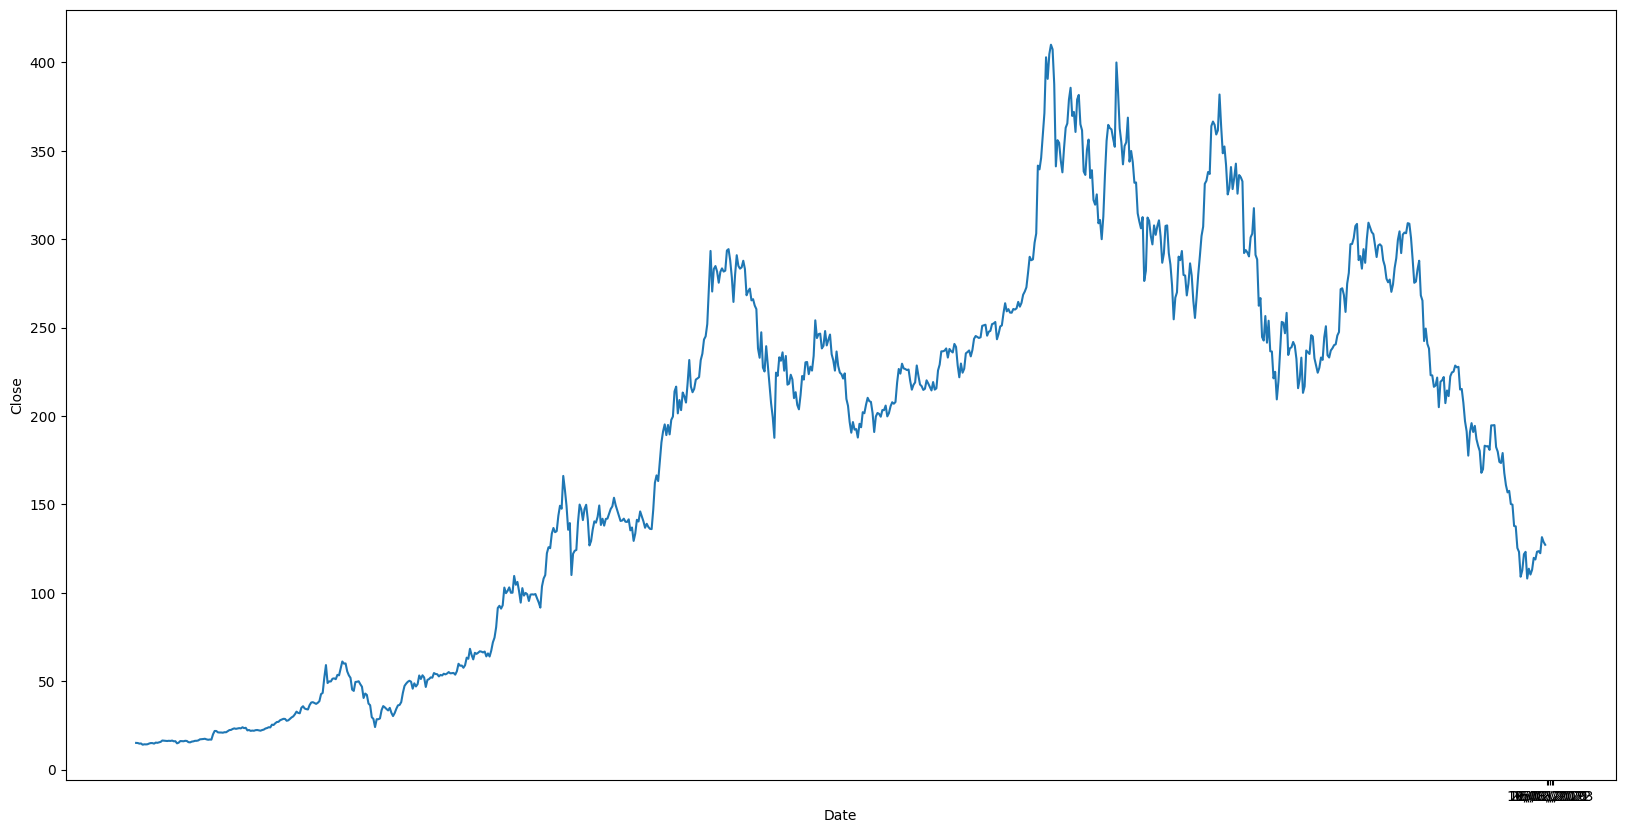

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

data=df.iloc[2300:].copy()

plt.figure(figsize=(20,10))
ax=sns.lineplot(x=data.index,y=data['Close'])
plt.xticks(['19/08/2019','16/03/2020','26/02/2021','15/03/2022','05/01/2023'])
plt.show()


In [19]:
#Moving Averages (MA) are a type of time series analysis method that can be helpful to identify underlying patterns or trends.
#I'll take moving average for window sizes of 30,60,120 and 150 days.
ma_day = [30, 60, 90, 120,150]

for ma in ma_day:
        column_name = f"MA for {ma} days"
        data[column_name] = data['Close'].rolling(ma).mean()

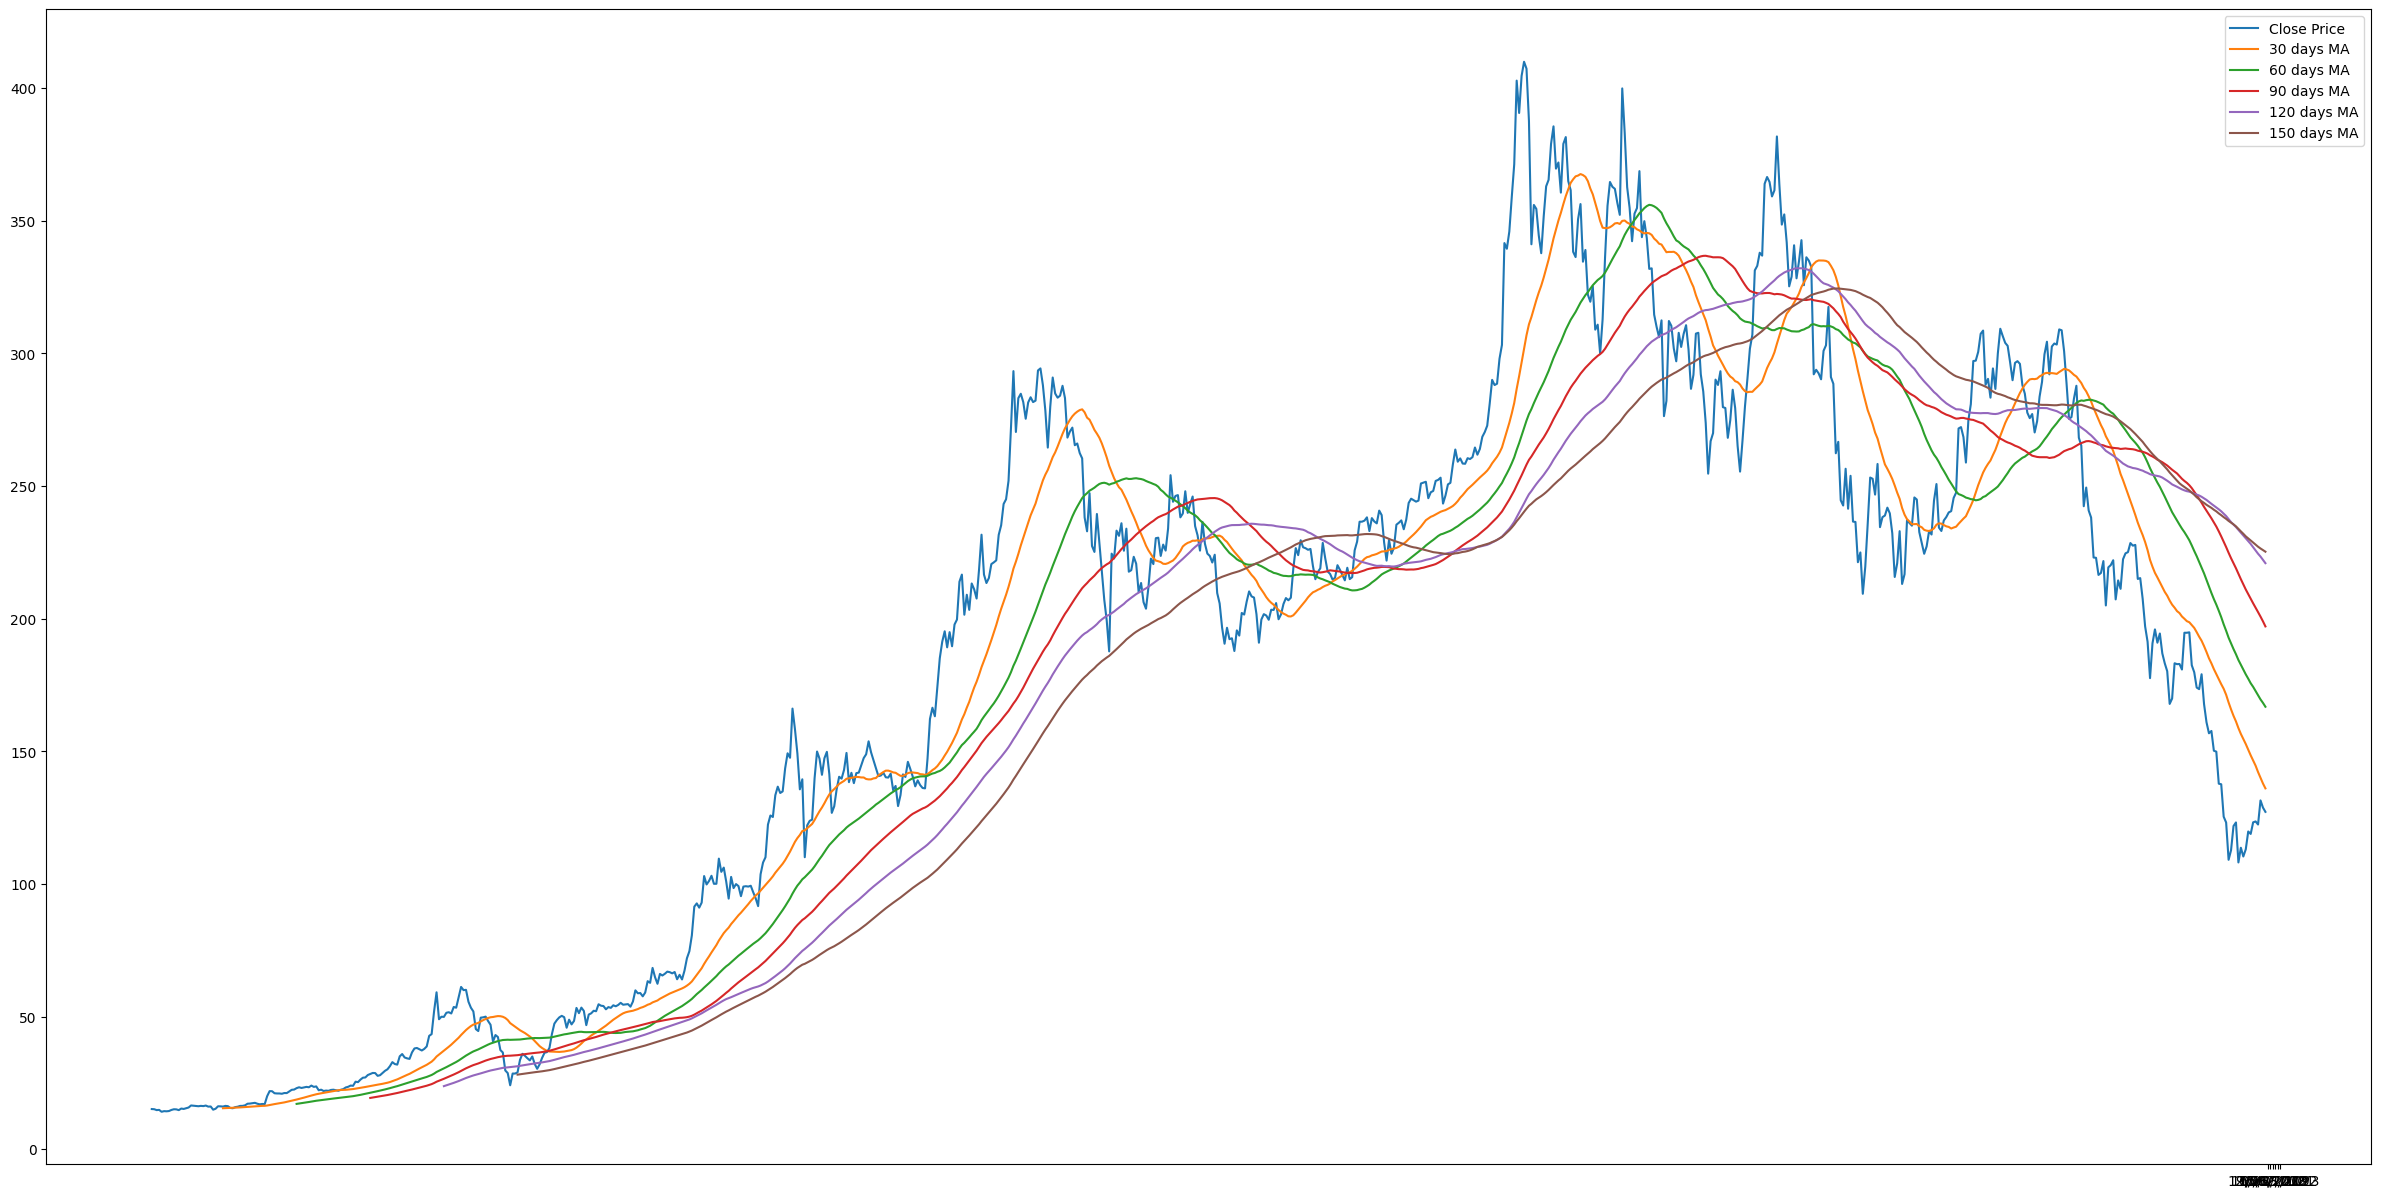

In [20]:
plt.figure(figsize=(30,15))
plt.plot(data['Close'],label='Close Price')
plt.plot(data['MA for 30 days'],label='30 days MA')
plt.plot(data['MA for 60 days'],label='60 days MA')
plt.plot(data['MA for 90 days'],label='90 days MA')
plt.plot(data['MA for 120 days'],label='120 days MA')
plt.plot(data['MA for 150 days'],label='150 days MA')
plt.xticks(['19/08/2018','16/03/2019','7/06/2020' ,'26/02/2021','15/03/2022','05/01/2023'])
plt.legend()
plt.show()

In [21]:
# Creating a new dataframe with only 'Close'
new_df = data['Close']
new_df.index = data.index

final_df=new_df.values

train_data=final_df[0:645,]
test_data=final_df[645:,]

train_df = pd.DataFrame()
test_df = pd.DataFrame()

train_df['Close'] = train_data
train_df.index = new_df[0:645].index
test_df['Close'] = test_data
test_df.index = new_df[645:].index

In [22]:
print("train_data: ", train_df.shape)
print("test_data: ", test_df.shape)

train_data:  (645, 1)
test_data:  (217, 1)


We use Min-Max scaling, it is particularly useful when working with algorithms that make assumptions about the scale of the input features, such as some distance-based algorithms or algorithms sensitive to the scale of the input features.

In [25]:
# Using Min-Max scaler to scale data
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(final_df.reshape(-1,1))

X_train_data,y_train_data=[],[]

for i in range(60,len(train_df)):
    X_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])

X_train_data,y_train_data=np.array(X_train_data),np.array(y_train_data)

X_train_data=np.reshape(X_train_data,(X_train_data.shape[0],X_train_data.shape[1],1))

**LSTMs take in previous time steps as inputs, and use their memory cells, gates, and state updates to process and make predictions on future time steps.**

In [27]:
# Initializing the LSTM model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM
from itertools import cycle
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train_data.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
model.add(Dense(units = 1))

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 60, 50)            10400     
                                                                 
 dropout_4 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_5 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_5 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_6 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_6 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_7 (LSTM)               (None, 50)               

**PREDICTION ON TRAINED  or TEST DATA SET**

In [51]:
input_data=new_df[len(new_df)-len(test_df)-60:].values
input_data=input_data.reshape(-1,1)
input_data=scaler.transform(input_data)

In [52]:
X_test=[]
for i in range(60,input_data.shape[0]):
    X_test.append(input_data[i-60:i,0])
X_test=np.array(X_test)

X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [54]:
test_df['Predictions']=predicted


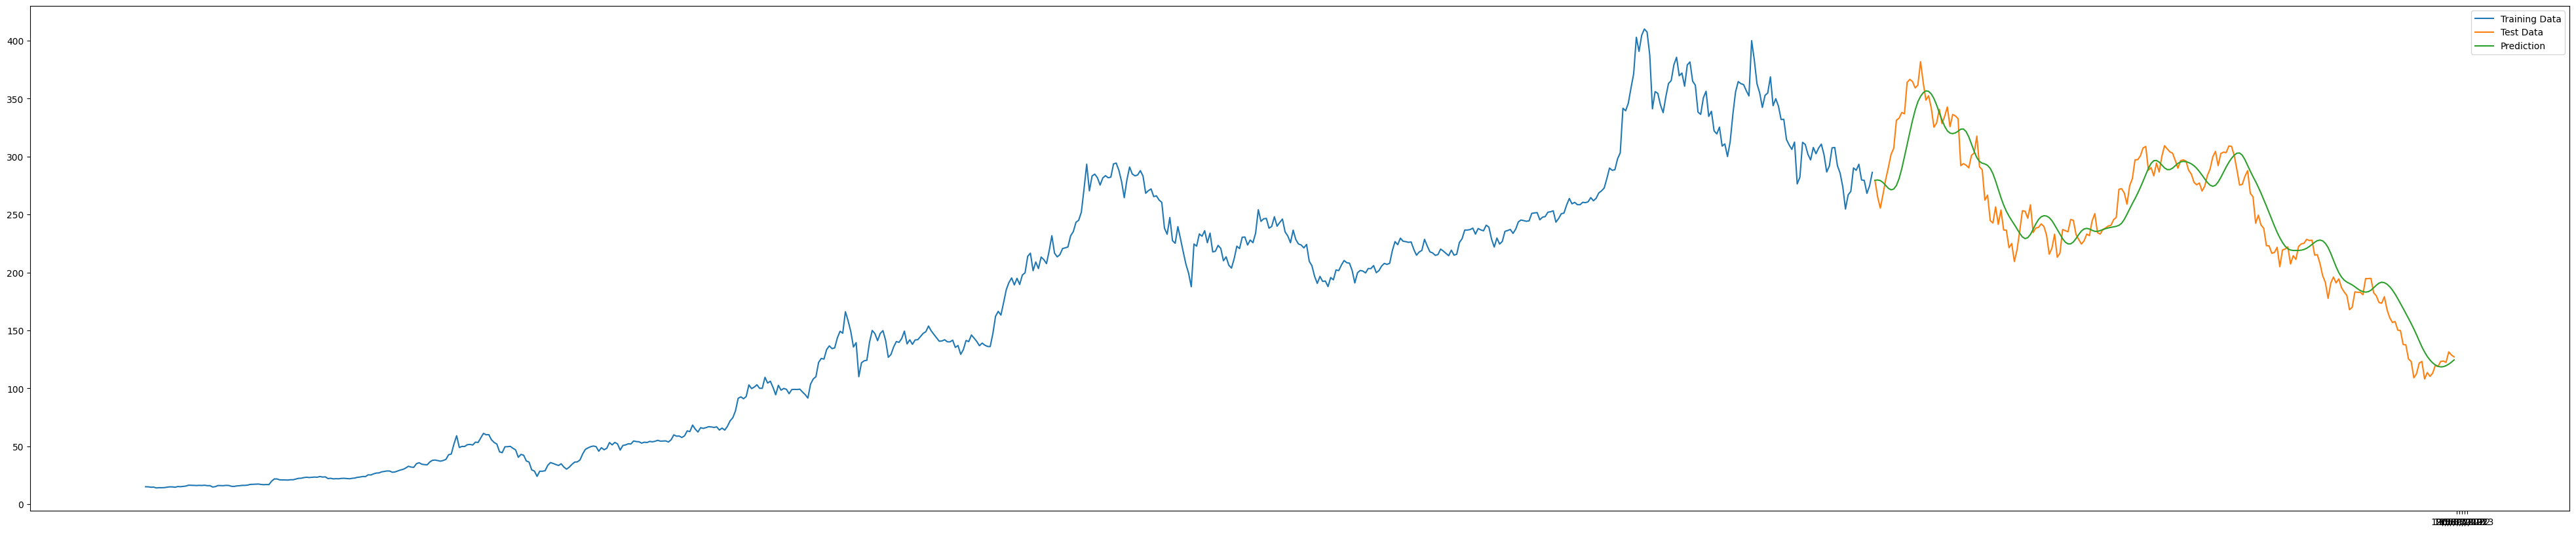

In [55]:
plt.figure(figsize=(50,10))
plt.plot(train_df['Close'],label='Training Data')
plt.plot(test_df['Close'],label='Test Data')
plt.plot(test_df['Predictions'],label='Prediction')
plt.xticks(['19/08/2019','16/03/2020','26/02/2021','15/03/2022','05/01/2023'])
plt.legend()
plt.show()